In [130]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Definir palabras vacías adicionales a eliminar
extra_stopwords = [...]  # Agrega aquí las palabras adicionales a eliminar

# Función para preprocesar el texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminación de signos de puntuación
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Conversión a minúsculas
    tokens = [token.lower() for token in tokens]
    
    # Eliminación de palabras vacías
    stop_words = set(stopwords.words('english') + extra_stopwords)
    tokens = [token for token in tokens if token not in stop_words]
    
    # Unir tokens preprocesados en una cadena de texto
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Archivo de entrenamiento
df_train = pd.read_csv('dataframe_train.csv')

# Aplicar preprocesamiento a las columnas relevantes del conjunto de entrenamiento
df_train['title_cleaned_preprocessed'] = df_train['title_cleaned_nostopwords'].apply(preprocess_text)
df_train['description_preprocessed'] = df_train['description_nostopwords'].apply(preprocess_text)
df_train['full_content_preprocessed'] = df_train['full_content_nostopwords'].apply(preprocess_text)

# Archivo de prueba
df_test = pd.read_csv('dataframe_test.csv')

# Aplicar preprocesamiento a las columnas relevantes del conjunto de prueba
df_test['title_cleaned_preprocessed'] = df_test['title_cleaned_nostopwords'].apply(preprocess_text)
df_test['description_preprocessed'] = df_test['description_nostopwords'].apply(preprocess_text)
df_test['full_content_preprocessed'] = df_test['full_content_nostopwords'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /home/zuzu9627/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zuzu9627/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
df_clean_train = pd.read_csv('./dataframe_train.csv')

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Definir palabras vacías adicionales a eliminar
extra_stopwords = [...]  # Agrega aquí las palabras adicionales a eliminar

# Función para preprocesar el texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminación de signos de puntuación
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Conversión a minúsculas
    tokens = [token.lower() for token in tokens]
    
    # Eliminación de palabras vacías
    stop_words = set(stopwords.words('english') + extra_stopwords)
    tokens = [token for token in tokens if token not in stop_words]
    
    # Unir tokens preprocesados en una cadena de texto
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Aplicar preprocesamiento a las columnas relevantes
df_clean_train['title_cleaned_preprocessed'] = df_clean_train['title_cleaned_nostopwords'].apply(preprocess_text)
df_clean_train['description_preprocessed'] = df_clean_train['description_nostopwords'].apply(preprocess_text)
df_clean_train['full_content_preprocessed'] = df_clean_train['full_content_nostopwords'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /home/zuzu9627/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zuzu9627/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar el vectorizador en los datos preprocesados
features = vectorizer.fit_transform(df_clean_train['full_content_preprocessed'])


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, df_clean_train['victory_flag'], test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [134]:
# Realizar predicciones en el conjunto de prueba:
y_pred = rf_model.predict(X_test)
# Utilizamos el método predict del modelo para realizar predicciones en el conjunto de prueba X_test. El
# modelo asignará una etiqueta a cada imagen de prueba basado en sus características y la información
# aprendida durante el entrenamiento.

In [135]:
# Aplicar preprocesamiento y extracción de características a nuevos datos
new_text = preprocess_text("GRANT MILITARY BURIAL HONORS WOMEN WWII PILOTS")
new_features = vectorizer.transform([new_text])

# Realizar predicciones
predictions = rf_model.predict(new_features)
# Imprimir la predicción
print("La predicción es:", predictions)

La predicción es: [0]


In [136]:
# Cargar el archivo de prueba (suponiendo que tiene columnas similares a df_clean_train)
df_test = pd.read_csv('dataframe_test.csv')

# Aplicar preprocesamiento al texto en el archivo de prueba
df_test['title_cleaned_preprocessed'] = df_test['title_cleaned_nostopwords'].apply(preprocess_text)
df_test['description_preprocessed'] = df_test['description_nostopwords'].apply(preprocess_text)
df_test['full_content_preprocessed'] = df_test['full_content_nostopwords'].apply(preprocess_text)

# Combinar las columnas preprocesadas en un solo texto
df_test['combined_preprocessed'] = df_test['title_cleaned_preprocessed'] + ' ' + df_test['description_preprocessed'] + ' ' + df_test['full_content_preprocessed']

# Transformar el texto preprocesado en características utilizando el vectorizador
test_features = vectorizer.transform(df_test['combined_preprocessed'])

# Realizar predicciones en los datos de prueba utilizando el modelo entrenado
predictions = rf_model.predict(test_features)

# Añadir la columna 'victory_flag_prediction' al dataframe de prueba
df_test['victory_flag_prediction'] = predictions

# Filtrar los valores del dataframe cuando victory_flag_prediction es igual a 1
filtered_df = df_test[df_test['victory_flag_prediction'] == 1]

# Mostrar los valores filtrados
filtered_df




,title_cleaned_nostopwords,description_nostopwords,full_content_nostopwords,supporters,title_cleaned_preprocessed,description_preprocessed,full_content_preprocessed,combined_preprocessed,victory_flag_prediction
274,TELL ELECTRONIC ARTS OPPOSE INTERNET CENSORSHIP,"SOPA . N'T MESS INTERNET , EA . REGRET .",STOP ONLINE PIRACY ACT ( SOPA ) TOOL PROTECTS ...,136264,tell electronic arts oppose internet censorship,sopa n't mess internet ea regret,stop online piracy act sopa tool protects mono...,tell electronic arts oppose internet censorshi...,1


In [137]:
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 86.14%


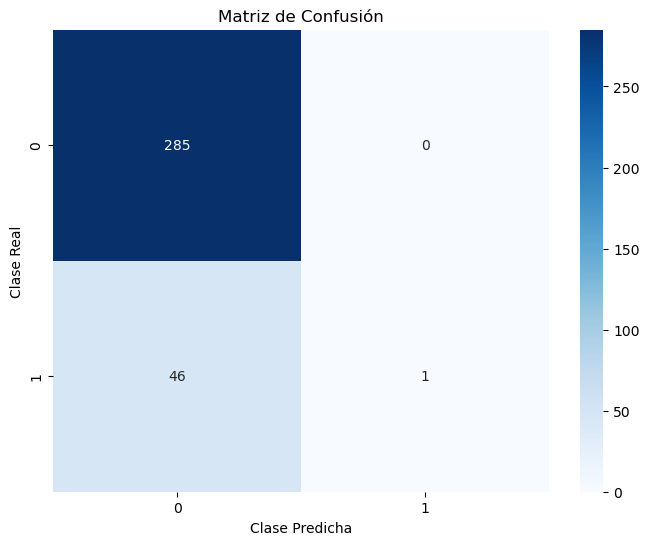

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       285
           1       1.00      0.02      0.04        47

    accuracy                           0.86       332
   macro avg       0.93      0.51      0.48       332
weighted avg       0.88      0.86      0.80       332



In [140]:
from sklearn.metrics import accuracy_score, f1_score

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score del modelo: {:.2f}".format(f1))


Precisión del modelo: 86.14%
F1-Score del modelo: 0.04
